In [1]:
import turicreate as tc

sales = tc.SFrame("home_data.sframe\home_data.sframe\m_1ce96d9d245ca490.frame_idx")

# Exploring dataset

In [2]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Show scatter plot between the sqrft vs price

In [3]:
scplt = tc.visualization.scatter(sales["sqft_living"].head(),sales["price"].head(),xlabel="sqrft",ylabel="price")

In [4]:
scplt

# get the max price and first prices in the data for more exploration

In [9]:
sales["price"].head()

dtype: float
Rows: 10
[221900.0, 538000.0, 180000.0, 604000.0, 510000.0, 1225000.0, 257500.0, 291850.0, 229500.0, 323000.0]

In [16]:
sales["price"].max()

7700000.0

# Spliting the data set and creating a linear regression model based on the sqft_living column

In [3]:
train_data, test_data = sales.random_split(.8,seed=0)

In [4]:
sqft_model = tc.linear_regression.create(train_data,target = "price",features=["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.006344     | 4338292.877922     | 2892487.226585       | 264093.564226                   | 240130.921277                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [19]:
test_data["price"].mean()

543054.0425632538

# evaluating the model on the test data

In [5]:
sqft_model.evaluate(test_data)

{'max_error': 4134612.628692629, 'rmse': 255207.6443053947}

# ploting the line that the model createed along with the test data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

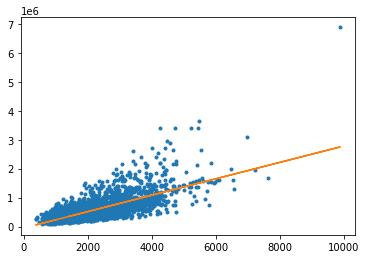

In [9]:
plt.plot(test_data["sqft_living"],test_data["price"],".",test_data["sqft_living"],sqft_model.predict(test_data),"-")

In [12]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48664.63569185848,5063.035157152832
sqft_living,None,283.01840313440135,2.222566000187186


# some visualization of some columns

In [5]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [6]:
sales[my_features].show()

Materializing SFrame

In [15]:
box = tc.visualization.box_plot(sales['zipcode'],sales['price'])

In [16]:
box

# creating another linear regression model based on 6 features

In [19]:
my_feature_model = tc.linear_regression.create(train_data,target="price",features = my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.077792     | 4105417.842701     | 2109352.519257       | 188016.763399                   | 211176.524944                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [20]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


# Evaluating the two models on the test data to show the diffrence in rmse and max_error 

In [21]:
print(sqft_model.evaluate(test_data))
print(my_feature_model.evaluate(test_data))

{'max_error': 4134612.628692629, 'rmse': 255207.6443053947}
{'max_error': 3180657.0339603955, 'rmse': 180460.19930183305}


#  creating another linear regression model based on 13 features

In [23]:
ultimate_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode' , 'waterfront','view','condition',
                    'grade','sqft_above','sqft_basement', 'lat']
ultimate_model = tc.linear_regression.create(train_data,target='price',features=ultimate_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 13

Number of unpacked features : 13

Number of coefficients    : 82

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.041772     | 4372269.019404     | 1134056.656602       | 164379.260588                   | 142226.376349                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluating the 3 models

In [24]:
print(sqft_model.evaluate(test_data))
print(my_feature_model.evaluate(test_data))
print(ultimate_model.evaluate(test_data))

{'max_error': 4134612.628692629, 'rmse': 255207.6443053947}
{'max_error': 3180657.0339603955, 'rmse': 180460.19930183305}
{'max_error': 3124868.173005685, 'rmse': 155947.33476086764}


# testing the three models on two houses to see the most accurate one

In [25]:
house1 = sales[sales["id"] == '5309101200']

In [26]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [29]:
house1["price"]

dtype: float
Rows: ?
[620000.0, ... ]

In [30]:
print(sqft_model.predict(house1))

[630579.5318307048]


In [31]:
print(my_feature_model.predict(house1))

[730334.9586513983]


In [32]:
print(ultimate_model.predict(house1))

[652761.753148146]


In [33]:
house2 = sales[sales["id"] == '1925069082']

In [34]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [35]:
print(sqft_model.predict(house2))
print(my_feature_model.predict(house2))
print(ultimate_model.predict(house2))

[1264540.7548517636]
[1227686.0171784605]
[1937382.6687237704]
